<div align='center' style='font-family:"B Nazanin"'>
<h1> تکلیف سری چهارم درس سیستم های چندرسانه ای </h1>
<h2> سارا برادران - شماره دانشجویی : 9624193 </h2>
</div>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def Show_Images(img_list, label, fig_size):
    
    img_num = len(img_list)
    if img_num == 1:
        plt.figure(figsize=fig_size) 
        plt.imshow(img_list[0], cmap="gray")
        plt.title("{}\n{}".format(label[0], img_list[0].shape[0:2]))
    
    else:
        fig, ax = plt.subplots(1, img_num, figsize=fig_size)
        for i in range(img_num):
            ax[i].imshow(img_list[i], cmap="gray")
            ax[i].set_title("{}\n{}".format(label[i], img_list[i].shape[0:2]))
        
    plt.show()

In [3]:
img_path = r'Pics\IUT.bmp'
src_img = cv2.imread(img_path)
src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
سوال 1 )
</span>
</h3> 
</div>

In [4]:
def H4_Shadow(src_img, s, d):
    
    # Size of the image in pixels (size of original image)
    height, width = src_img.shape

    blured_img = cv2.GaussianBlur(src_img, (35, 35), d)
    
    r_shift = [[0 for i in range(width)] for i in range(height)]
    d_shift = [[0 for i in range(width)] for i in range(height)]
    
    for i in range(height):
        for j in range(width):
            d_shift[i][j] = blured_img[(i - s) % height][j]

    for i in range(height):
        for j in range(width):
            r_shift[i][j] = blured_img[i][(j - s) % width]
            
    shadow_img = np.array(r_shift)
    
    new_img = np.minimum(src_img, shadow_img)

    return new_img

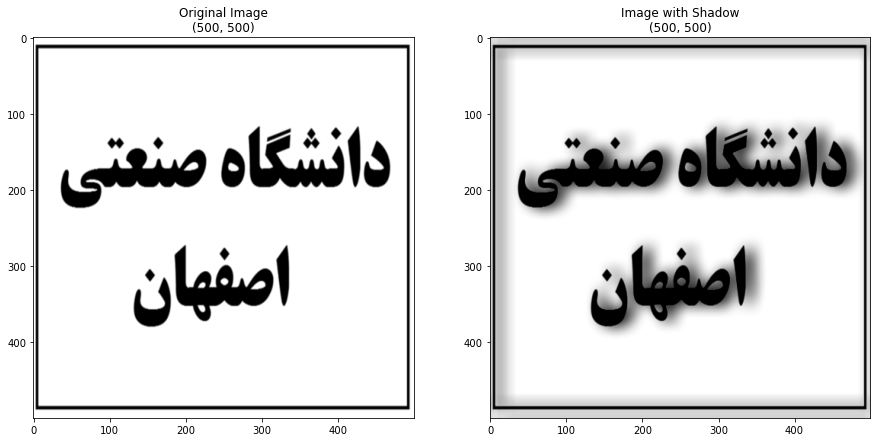

In [5]:
new_img = H4_Shadow(src_img, s=10, d=10)

# Show the image with matplotlib
Show_Images(img_list=[src_img, new_img], 
            label=['Original Image', 'Image with Shadow'], 
            fig_size=(15,15))

In [6]:
def H4_Hybrid(src_img1, src_img2, m, n):
    
    # Size of the image in pixels (size of original image)
    height, width = src_img1.shape

    blured_img1 = cv2.GaussianBlur(src_img1, (35, 35), m)
    blured_img2 = cv2.GaussianBlur(src_img2, (35, 35), n)
    
    src_img1 = src_img1.astype(int)
    src_img2 = src_img2.astype(int)
    
    hfr_img = [[0 for i in range(width)] for i in range(height)]
    new_img = [[0 for i in range(width)] for i in range(height)]

    hfr_img = src_img2 - blured_img2
    
    new_img = blured_img1 + hfr_img

    for i in range(height):
        for j in range(width):
            if new_img[i][j] < 0: new_img[i][j] = 0
            elif new_img[i][j] > 255: new_img[i][j] = 255
                
    new_img = np.array(new_img.astype(np.uint8))
   
    return new_img

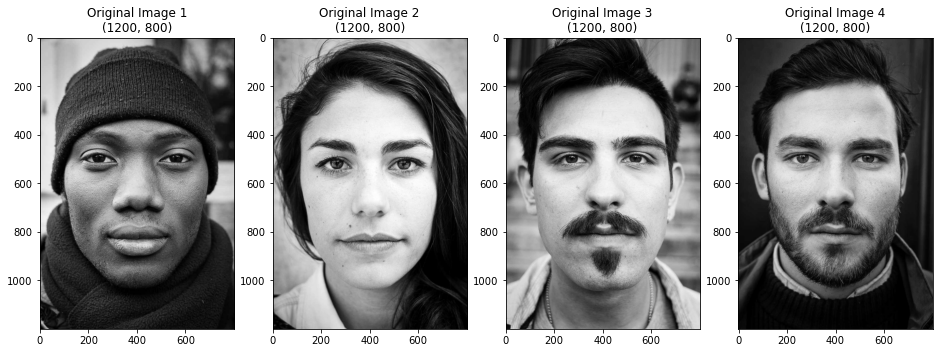

In [7]:
src_img = [0 for i in range(0, 5)]

img_path = r'Pics\face1.png'
src_img[1] = cv2.imread(img_path)
src_img[1] = cv2.cvtColor(src_img[1], cv2.COLOR_BGR2GRAY)

img_path = r'Pics\face2.png'
src_img[2] = cv2.imread(img_path)
src_img[2] = cv2.cvtColor(src_img[2], cv2.COLOR_BGR2GRAY)

img_path = r'Pics\face3.png'
src_img[3] = cv2.imread(img_path)
src_img[3] = cv2.cvtColor(src_img[3], cv2.COLOR_BGR2GRAY)

img_path = r'Pics\face4.png'
src_img[4] = cv2.imread(img_path)
src_img[4] = cv2.cvtColor(src_img[4], cv2.COLOR_BGR2GRAY)

Show_Images(img_list=[src_img[1], src_img[2], src_img[3], src_img[4]], 
            label=['Original Image 1', 'Original Image 2', 'Original Image 3', 'Original Image 4'], 
            fig_size=(16,16))

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
سوال 2 )
</span>
</h3> 
</div>

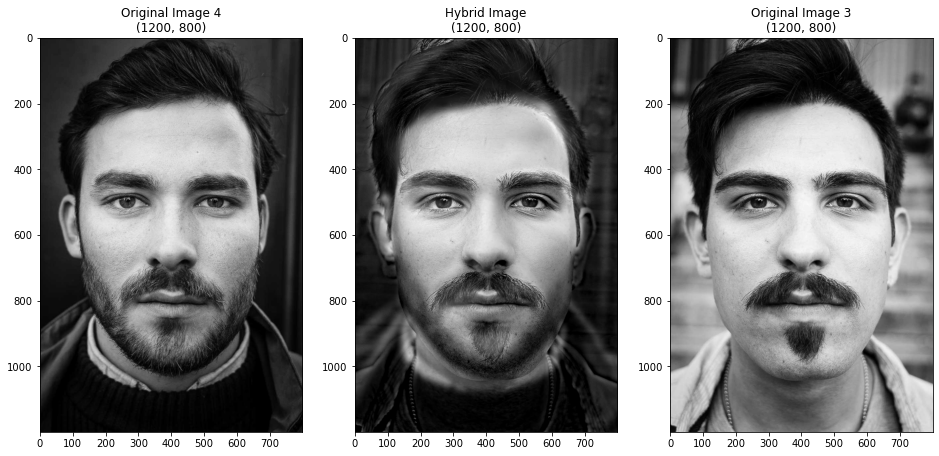

In [8]:
new_img = H4_Hybrid(src_img[4], src_img[3], m=10, n=10)

# Show the image with matplotlib
Show_Images(img_list=[src_img[4], new_img, src_img[3]], 
            label=['Original Image 4', 'Hybrid Image', 'Original Image 3'], 
            fig_size=(16,16))

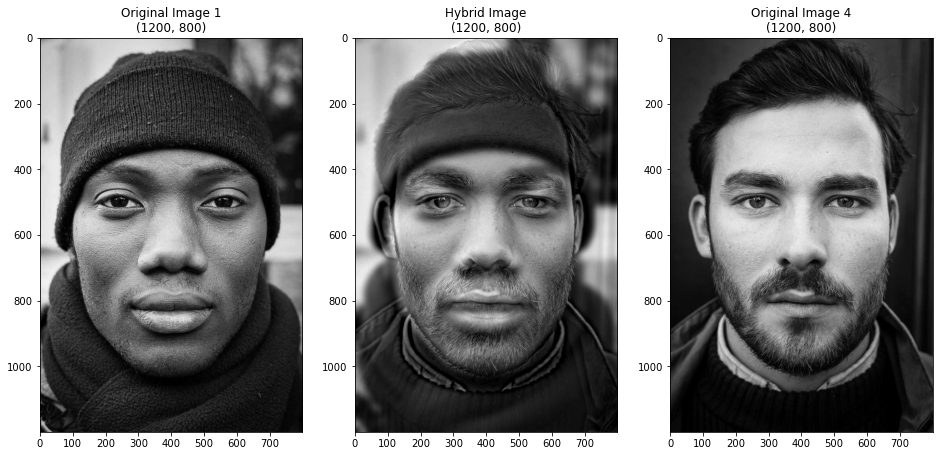

In [9]:
new_img = H4_Hybrid(src_img[1], src_img[4], m=10, n=10)

# Show the image with matplotlib
Show_Images(img_list=[src_img[1], new_img, src_img[4]], 
            label=['Original Image 1', 'Hybrid Image', 'Original Image 4'], 
            fig_size=(16,16))